In [116]:
import fbprophet
import pandas as pd
import time
from fbprophet import Prophet
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error, classification_report
from sklearn.metrics import accuracy_score

In [117]:
big_df = pd.read_csv("all_data_historic.csv", header=0)
big_df.shape

(11900, 30)

In [118]:
big_df.drop(['polarity', 'subjectivity'], axis=1, inplace=True)

In [119]:
df = pd.read_csv("sentiment.csv", header=0)
df.shape

(1190, 3)

In [120]:
df

,Date,polarity,subjectivity
0,1/7/2019,0.211240,0.341574
1,2/7/2019,0.246338,0.319595
2,3/7/2019,0.181414,0.066015
3,4/7/2019,0.163393,0.218119
4,5/7/2019,0.050206,0.075301
...,...,...,...
1185,28/9/2022,0.087345,0.416711
1186,29/9/2022,0.072305,0.430498
1187,30/9/2022,0.071084,0.427040
1188,1/10/2022,0.065221,0.423666


In [121]:
concat_df = pd.concat([df, df, df, df, df, df, df, df, df, df], axis=0)

In [122]:
concat_df

,Date,polarity,subjectivity
0,1/7/2019,0.211240,0.341574
1,2/7/2019,0.246338,0.319595
2,3/7/2019,0.181414,0.066015
3,4/7/2019,0.163393,0.218119
4,5/7/2019,0.050206,0.075301
...,...,...,...
1185,28/9/2022,0.087345,0.416711
1186,29/9/2022,0.072305,0.430498
1187,30/9/2022,0.071084,0.427040
1188,1/10/2022,0.065221,0.423666


In [123]:
concat_df.drop(['Date'], axis=1, inplace=True)

In [124]:
concat_df = concat_df.reset_index()

In [125]:
concat_df.drop(['index'], axis=1, inplace=True)

In [126]:
concat_df

,polarity,subjectivity
0,0.211240,0.341574
1,0.246338,0.319595
2,0.181414,0.066015
3,0.163393,0.218119
4,0.050206,0.075301
...,...,...
11895,0.087345,0.416711
11896,0.072305,0.430498
11897,0.071084,0.427040
11898,0.065221,0.423666


In [127]:
final_df = pd.concat([big_df, concat_df], axis=1)

In [128]:
for col in ['Close_return', 'Close_sma_3', 'Close_ema_3', 'Close_std_3',
            'Close_sma_7','Close_ema_7', 'Close_std_7', 'Close_sma_20','Close_ema_20', 
            'Close_std_20', 'Close_mtd', 'Close_ytd', 'max_corr_coin_return', 'min_corr_coin_return']:
    final_df[col].fillna(value=final_df[col].mean(), inplace=True)

In [129]:
final_df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Coin,Close_return,...,Close_std_20,Year,Month,Close_mtd,Close_ytd,max_corr_coin_return,min_corr_coin_return,target,polarity,subjectivity
0,0,1/7/2019,10796.930660,11206.439450,10089.314450,10583.134770,10583.134770,2.937859e+10,BTC,0.002897,...,0.049879,2019,7,3.792117,-0.834313,0.002986,0.002118,1,0.211240,0.341574
1,1,2/7/2019,10588.683590,10912.188480,9737.884766,10801.677730,10801.677730,3.101590e+10,BTC,0.020650,...,0.049879,2019,7,0.000000,0.000000,-0.006963,-0.012424,1,0.246338,0.319595
2,2,3/7/2019,10818.156250,11968.078130,10818.156250,11961.269530,11961.269530,3.079649e+10,BTC,0.107353,...,0.049879,2019,7,4.198660,4.198660,0.039450,-0.014005,0,0.181414,0.066015
3,3,4/7/2019,11972.718750,12006.075200,11166.569340,11215.437500,11215.437500,2.592029e+10,BTC,-0.062354,...,0.049879,2019,7,-4.019543,-4.019543,-0.061289,0.052717,0,0.163393,0.218119
4,4,5/7/2019,11203.102540,11395.661130,10874.964840,10978.459960,10978.459960,2.383848e+10,BTC,-0.021130,...,0.049879,2019,7,-2.023219,-2.023219,0.012211,-0.016318,1,0.050206,0.075301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11895,1185,28/9/2022,52.730122,53.664368,51.357903,53.308426,53.308426,4.790784e+08,LTC,0.010830,...,0.069030,2022,9,-0.554154,-0.620623,0.016544,-0.002583,1,0.087345,0.416711
11896,1186,29/9/2022,53.307693,53.956154,52.447205,53.914047,53.914047,4.063915e+08,LTC,0.011361,...,0.069967,2022,9,-0.532325,-0.602048,0.007532,0.019684,0,0.072305,0.430498
11897,1187,30/9/2022,53.914841,54.988789,53.031113,53.397038,53.397038,4.126045e+08,LTC,-0.009590,...,0.070175,2022,9,-1.394763,-1.335909,-0.007217,-0.003361,0,0.071084,0.427040
11898,1188,1/10/2022,53.403042,53.709396,52.705292,52.906868,52.906868,2.569141e+08,LTC,-0.009180,...,0.070223,2022,10,-441.835719,-1.321554,-0.006160,-0.016468,0,0.065221,0.423666


In [130]:
final_df['Coin'].unique()

array(['BTC', 'ETH', 'BNB', 'XRP', 'ADA', 'DOGE', 'MATIC', 'TRX', 'LEO',
       'LTC'], dtype=object)

In [131]:
btc_df = final_df[final_df['Coin']=='BTC'].reset_index()
eth_df = final_df[final_df['Coin']=='ETH'].reset_index()
bnb_df = final_df[final_df['Coin']=='BNB'].reset_index()
xrp_df = final_df[final_df['Coin']=='XRP'].reset_index()
ada_df = final_df[final_df['Coin']=='ADA'].reset_index()
doge_df = final_df[final_df['Coin']=='DOGE'].reset_index()
matic_df = final_df[final_df['Coin']=='MATIC'].reset_index()
trx_df = final_df[final_df['Coin']=='TRX'].reset_index()
leo_df = final_df[final_df['Coin']=='LEO'].reset_index()

In [132]:
btc_train = btc_df[0:824] #01-07-2019 to 01-10-2021
btc_test = btc_df[824::] #02-10-2021 to 02-10-2022

eth_train = eth_df[0:824]
eth_test = eth_df[824::]

bnb_train = bnb_df[0:824]
bnb_test = bnb_df[824::]

xrp_train = xrp_df[0:824]
xrp_test = xrp_df[824::]

ada_train = ada_df[0:824]
ada_test = ada_df[824::]

doge_train = doge_df[0:824]
doge_test = doge_df[824::]

matic_train = matic_df[0:824]
matic_test = matic_df[824::]

trx_train = trx_df[0:824]
trx_test = trx_df[824::]

leo_train = leo_df[0:824]
leo_test = leo_df[824::]

In [133]:
features = ['Date', 'Open', 'Close', 'High', 'Low', 'Close_return', 'Close_sma_3', 'Close_sma_7', 'Close_sma_20',
            'Close_ema_3', 'Close_ema_7', 'Close_ema_20', 'Close_std_3', 'Close_std_7', 'Close_std_20',
            'Close_mtd', 'Close_ytd', 'max_corr_coin_return', 'min_corr_coin_return', 'target', 'polarity', 'subjectivity']

In [134]:
btc_train = btc_train[features]
btc_test = btc_test[features]

eth_train = eth_train[features]
eth_test = eth_test[features]

bnb_train = bnb_train[features]
bnb_test = bnb_test[features]

xrp_train = xrp_train[features]
xrp_test = xrp_test[features]

ada_train = ada_train[features]
ada_test = ada_test[features]

doge_train = doge_train[features]
doge_test = doge_test[features]

matic_train = matic_train[features]
matic_test = matic_test[features]

trx_train = trx_train[features]
trx_test = trx_test[features]

leo_train = leo_train[features]
leo_test = leo_test[features]

In [135]:
btc_train.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
btc_train['ds']= pd.to_datetime(btc_train['ds'])
btc_test.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
btc_test['ds']= pd.to_datetime(btc_test['ds'])

eth_train.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
eth_train['ds']= pd.to_datetime(eth_train['ds'])
eth_test.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
eth_test['ds']= pd.to_datetime(eth_test['ds'])

bnb_train.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
bnb_train['ds']= pd.to_datetime(bnb_train['ds'])
bnb_test.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
bnb_test['ds']= pd.to_datetime(bnb_test['ds'])

xrp_train.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
xrp_train['ds']= pd.to_datetime(xrp_train['ds'])
xrp_test.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
xrp_test['ds']= pd.to_datetime(xrp_test['ds'])

ada_train.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
ada_train['ds']= pd.to_datetime(ada_train['ds'])
ada_test.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
ada_test['ds']= pd.to_datetime(ada_test['ds'])

doge_train.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
doge_train['ds']= pd.to_datetime(doge_train['ds'])
doge_test.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
doge_test['ds']= pd.to_datetime(doge_test['ds'])

matic_train.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
matic_train['ds']= pd.to_datetime(matic_train['ds'])
matic_test.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
matic_test['ds']= pd.to_datetime(matic_test['ds'])

trx_train.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
trx_train['ds']= pd.to_datetime(trx_train['ds'])
trx_test.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
trx_test['ds']= pd.to_datetime(trx_test['ds'])

leo_train.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
leo_train['ds']= pd.to_datetime(leo_train['ds'])
leo_test.rename(columns = {'Date':'ds', 'Close_return':'y'}, inplace=True)
leo_test['ds']= pd.to_datetime(leo_test['ds'])

In [136]:
ada_train

,ds,Open,Close,High,Low,y,Close_sma_3,Close_sma_7,Close_sma_20,Close_ema_3,...,Close_std_3,Close_std_7,Close_std_20,Close_mtd,Close_ytd,max_corr_coin_return,min_corr_coin_return,target,polarity,subjectivity
0,2019-01-07,0.082098,0.083822,0.085895,0.080504,0.002897,0.002920,0.002935,0.003044,0.002886,...,0.042448,0.046501,0.049879,3.792117,-0.834313,0.002986,0.002118,0,0.211240,0.341574
1,2019-02-07,0.083800,0.081077,0.084598,0.076777,-0.032748,0.002920,0.002935,0.003044,-0.006963,...,0.042448,0.046501,0.049879,0.000000,0.000000,-0.006963,-0.012424,1,0.246338,0.319595
2,2019-03-07,0.081033,0.082998,0.083792,0.080197,0.023694,0.002920,0.002935,0.003044,0.016244,...,0.042448,0.046501,0.049879,-1.723512,-1.723512,0.039450,-0.014005,0,0.181414,0.066015
3,2019-04-07,0.083007,0.077774,0.083007,0.077588,-0.062941,-0.009601,0.002935,0.003044,-0.022523,...,0.050421,0.046501,0.049879,0.921993,0.921993,-0.061289,0.052717,0,0.163393,0.218119
4,2019-05-07,0.077805,0.076532,0.078091,0.076027,-0.015969,-0.003209,0.002935,0.003044,-0.005156,...,0.052110,0.046501,0.049879,-0.512354,-0.512354,0.012211,-0.016318,1,0.050206,0.075301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,2021-09-27,2.212038,2.135905,2.271561,2.133972,-0.032868,0.000935,0.000675,-0.006344,-0.012388,...,0.044360,0.066812,0.053798,2.308190,-0.014018,-0.041840,-0.026706,0,0.095897,0.428651
820,2021-09-28,2.133217,2.039139,2.172157,2.030042,-0.045304,-0.012781,0.003892,-0.009541,-0.027809,...,0.051540,0.063542,0.054006,3.559861,0.359034,-0.043230,-0.015101,1,0.107390,0.434133
821,2021-09-29,2.039015,2.065688,2.144665,2.023027,0.013020,-0.022913,-0.009972,-0.007724,-0.005739,...,0.033994,0.042908,0.054246,-2.310418,-1.390561,0.016331,0.086652,1,0.110636,0.437319
822,2021-09-30,2.066589,2.114452,2.134077,2.053454,0.023607,0.008387,-0.006139,-0.001972,0.023161,...,0.048139,0.047527,0.054178,-3.375994,-1.708148,0.052060,-0.032595,1,0.104238,0.440621


In [137]:
ada_test

,ds,Open,Close,High,Low,y,Close_sma_3,Close_sma_7,Close_sma_20,Close_ema_3,...,Close_std_3,Close_std_7,Close_std_20,Close_mtd,Close_ytd,max_corr_coin_return,min_corr_coin_return,target,polarity,subjectivity
824,2021-02-10,2.254531,2.251459,2.320416,2.195434,-0.002953,0.059800,0.022484,0.001342,0.043988,...,0.038802,0.052074,0.058344,-0.696232,-0.911419,0.025451,0.019168,1,0.088942,0.450973
825,2021-03-10,2.249317,2.252873,2.307575,2.223882,0.000628,0.045067,0.016932,0.003562,0.025925,...,0.049989,0.051122,0.057667,-1.064609,-1.018841,0.007862,-0.002375,0,0.093454,0.451354
826,2021-04-10,2.251848,2.189235,2.253159,2.155800,-0.028247,0.007372,0.021310,0.000816,0.007365,...,0.018328,0.046338,0.056958,1.905817,-0.152638,-0.011195,-0.013712,1,0.081532,0.447305
827,2021-05-10,2.189178,2.233124,2.256643,2.181561,0.020048,0.012540,0.033336,0.000150,0.024160,...,0.026388,0.036723,0.056374,-3.062303,-1.601386,0.040954,0.017929,0,0.075112,0.446688
828,2021-06-10,2.233087,2.212155,2.250027,2.116876,-0.009390,0.015797,0.033522,0.001640,0.020896,...,0.026123,0.036626,0.056426,-0.034057,-0.718322,0.017633,-0.021006,1,0.074830,0.445579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,2022-09-28,0.441782,0.437290,0.442514,0.426414,-0.010410,0.011115,0.009707,-0.008973,0.004537,...,0.018481,0.026992,0.046038,0.047740,-1.204281,0.005476,-0.002583,1,0.087345,0.416711
1186,2022-09-29,0.437308,0.438170,0.438368,0.428464,0.002012,0.000091,0.000957,-0.011599,0.001611,...,0.004838,0.015462,0.043871,-1.202540,-0.960510,-0.001315,0.019684,0,0.072305,0.430498
1187,2022-09-30,0.438183,0.434414,0.440544,0.430249,-0.008572,-0.000528,0.000074,-0.013547,-0.002067,...,0.005652,0.015672,0.042623,-0.137236,-1.168216,-0.005745,-0.003361,0,0.071084,0.427040
1188,2022-01-10,0.434429,0.430293,0.436231,0.428957,-0.009486,-0.006453,-0.000579,-0.013757,-0.007184,...,0.005527,0.016139,0.042606,-0.024139,-1.186159,-0.012300,-0.016468,0,0.065221,0.423666


In [138]:
btc_test_copy = btc_test
btc_y_true = btc_test['y'].values
btc_test.drop('y', axis=1, inplace=True)

eth_test_copy = eth_test
eth_y_true = eth_test['y'].values
eth_test.drop('y', axis=1, inplace=True)

bnb_test_copy = bnb_test
bnb_y_true = bnb_test['y'].values
bnb_test.drop('y', axis=1, inplace=True)

xrp_test_copy = xrp_test
xrp_y_true = xrp_test['y'].values
xrp_test.drop('y', axis=1, inplace=True)

ada_test_copy = ada_test
ada_y_true = ada_test['y'].values
ada_test.drop('y', axis=1, inplace=True)

doge_test_copy = doge_test
doge_y_true = doge_test['y'].values
doge_test.drop('y', axis=1, inplace=True)

matic_test_copy = matic_test
matic_y_true = matic_test['y'].values
matic_test.drop('y', axis=1, inplace=True)

trx_test_copy = trx_test
trx_y_true = trx_test['y'].values
trx_test.drop('y', axis=1, inplace=True)

leo_test_copy = leo_test
leo_y_true = leo_test['y'].values
leo_test.drop('y', axis=1, inplace=True)

In [139]:
l = ['Open', 'High', 'Low', 'Close', 'Close_sma_3', 'Close_sma_7', 'Close_sma_20',
            'Close_ema_3', 'Close_ema_7', 'Close_ema_20', 'Close_std_3', 'Close_std_7', 'Close_std_20',
            'Close_mtd', 'Close_ytd', 'max_corr_coin_return', 'min_corr_coin_return', 'polarity', 'subjectivity']

In [140]:
btc_model = Prophet()
for col in l:
    btc_model.add_regressor(col, standardize=False)
st = time.time()
btc_model.fit(btc_train)
et = time.time()
elapsed_time1 = et - st
print(elapsed_time1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.95904
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -6.95904             0   1.08289e+06       1e-12       0.001       32   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -856.851
9.058464050292969Iteration  1. Log joint probability =    654.792. Improved by 1511.64.
Iteration  2. Log joint probability =     1473.2. Improved by 818.405.
Iteration  3. Log joint probability =    1833.84. Improved by 360.643.
Iteration  4. Log joint probability =    2263.67. Improved by 429.826.
Iteration  5. Log joint probability =    2263.89. Improved by 0.224233.
Iteration  6. Log joint probability =    2264.24. Improved by 0.344556.
Iteration  7. Log joint probability =    2264.54. Improved by 0.308472.
Iteration  8. Log joint probability =    2265.75. Improved by 1.20177.
Iteration  9. Log joint proba

In [51]:
btc_forecast = btc_model.predict(btc_test)

   2442.38. Improved by 2.52928e-07.
Iteration 111. Log joint probability =    2442.38. Improved by 2.1287e-06.
Iteration 112. Log joint probability =    2442.38. Improved by 6.95398e-07.
Iteration 113. Log joint probability =    2442.38. Improved by 1.32452e-06.
Iteration 114. Log joint probability =    2442.38. Improved by 3.18351e-07.
Iteration 115. Log joint probability =    2442.38. Improved by 1.31716e-07.
Iteration 116. Log joint probability =    2442.38. Improved by 4.46987e-07.
Iteration 117. Log joint probability =    2442.38. Improved by 4.2537e-07.
Iteration 118. Log joint probability =    2442.38. Improved by 1.59484e-08.
Iteration 119. Log joint probability =    2442.38. Improved by 3.28534e-07.
Iteration 120. Log joint probability =    2442.38. Improved by 8.91391e-08.
Iteration 121. Log joint probability =    2442.38. Improved by 8.03461e-08.
Iteration 122. Log joint probability =    2442.38. Improved by 4.84961e-08.
Iteration 123. Log joint probability =    2442.38. Im

In [52]:
print(btc_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2021-01-11 -0.012354   -0.027004    0.002903
1 2021-01-12 -0.006140   -0.021038    0.008444
2 2021-02-10 -0.007123   -0.022258    0.007762
3 2021-02-11  0.054003    0.038198    0.070048
4 2021-02-12 -0.017433   -0.032098   -0.002972


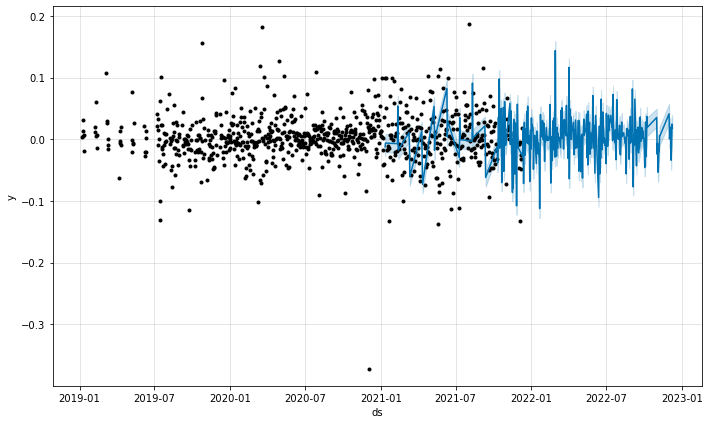

In [53]:
btc_model.plot(btc_forecast)
pyplot.show()

In [54]:
btc_y_pred = btc_forecast['yhat'].values
btc_mae = mean_absolute_error(btc_y_true, btc_y_pred)
print('MAE: %.3f' % btc_mae)

MAE: 0.035


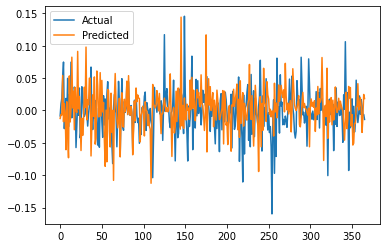

In [55]:
pyplot.plot(btc_y_true, label='Actual')
pyplot.plot(btc_y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [56]:
btc_mean = btc_y_true.mean()
btc_pred_targets = []
for i in btc_y_pred:
    if i>btc_mean:
        btc_pred_targets.append(0)
    else:
        btc_pred_targets.append(1)

In [57]:
btc_accuracy = accuracy_score(btc_test['target'].values, btc_pred_targets)
print(btc_accuracy)

0.5136612021857924


In [144]:
eth_model = Prophet()
for col in l:
    eth_model.add_regressor(col, standardize=False)
st = time.time()
eth_model.fit(eth_train)
et = time.time()
elapsed_time2 = et - st
print(elapsed_time2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -9.17205
0.9602146148681641
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       332.506     0.0070483       15641.6           1           1      145   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       864.021   0.000988413       52814.9           1           1      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1297.4    0.00509751        365745      0.2932           1      389   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1325.54     0.0207471        746883           1           1      512   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1610.27    0.00151371        259036      0.3042      0.3042      647   
    Iter      log prob        ||dx||      ||g

In [59]:
eth_forecast = eth_model.predict(eth_test)

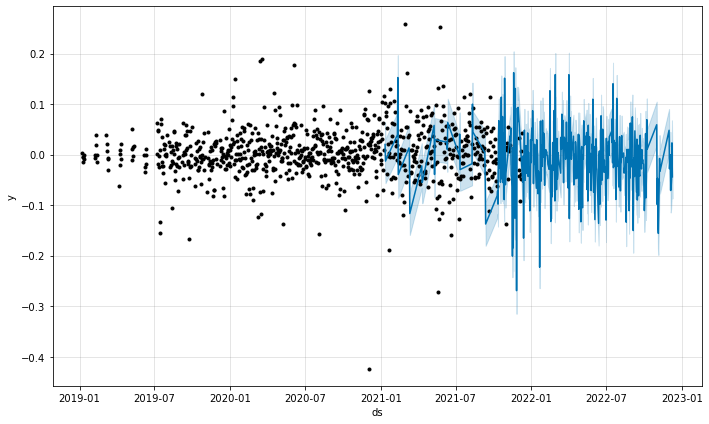

In [60]:
eth_model.plot(eth_forecast)
pyplot.show()

In [61]:
eth_y_pred = eth_forecast['yhat'].values
eth_mae = mean_absolute_error(eth_y_true, eth_y_pred)
print('MAE: %.3f' % eth_mae)

eth_mean = eth_y_true.mean()
eth_pred_targets = []
for i in eth_y_pred:
    if i>eth_mean:
        eth_pred_targets.append(0)
    else:
        eth_pred_targets.append(1)

eth_accuracy = accuracy_score(eth_test['target'].values, eth_pred_targets)
print('accuracy score: ', eth_accuracy)

MAE: 0.057
accuracy score:  0.4808743169398907


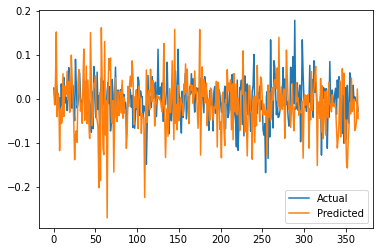

In [62]:
pyplot.plot(eth_y_true, label='Actual')
pyplot.plot(eth_y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [145]:
bnb_model = Prophet()
for col in l:
    bnb_model.add_regressor(col, standardize=False)
st = time.time()
print(st)
bnb_model.fit(bnb_train)
et = time.time()
print(et)
elapsed_time3 = et-st
print(elapsed_time3)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1668073472.971222
1668073475.81552Initial log joint probability = -5.33262

2.8442981243133545
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2195.84    0.00231334       23664.6       0.957       0.957      142   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2399.76    0.00157673       84348.3           1           1      266   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2423.21   5.43808e-05       45074.4           1           1      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2443.02    0.00078457        109847     0.04859           1      513   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2457.19   2.61543e-06       4218.32           1           1      650   
    Iter  

    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    6199       3059.46   3.08793e-06       10040.8           1           1     7723   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    6299       3061.51   2.50653e-05       24042.1      0.5449      0.5449     7844   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    6399       3068.37   9.22166e-06       4470.51           1           1     7963   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    6499       3073.14   4.96107e-06       12128.2           1           1     8076   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    6599       3075.46   2.13791e-05       4396.73      0.9474      0.9474     8204   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    6699     

In [64]:
bnb_forecast = bnb_model.predict(bnb_test)

rob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3999       2859.58    1.6385e-05       4104.77      0.6535      0.6535     5019   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4099       2865.38   0.000205353         20790           1           1     5144   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4199       2877.18    0.00556721       37570.5           1           1     5270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4299       2887.05   5.10576e-05       20857.6           1           1     5390   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4399       2915.34   0.000144986         30650           1           1     5515   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499       2948.93   0.00044

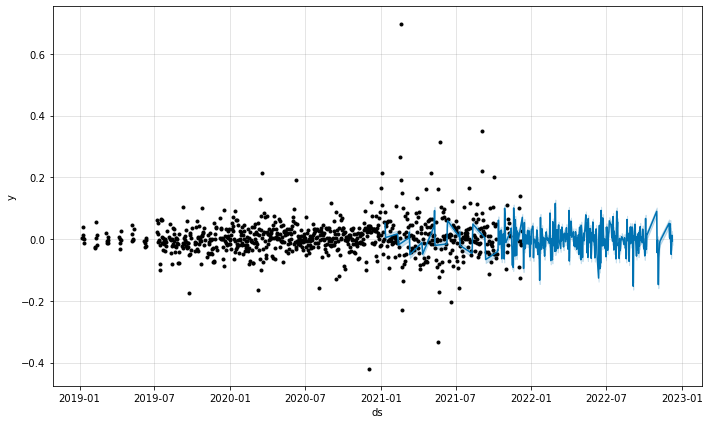

In [65]:
bnb_model.plot(bnb_forecast)
pyplot.show()

In [66]:
bnb_y_pred = bnb_forecast['yhat'].values
bnb_mae = mean_absolute_error(bnb_y_true, bnb_y_pred)
print('MAE: %.3f' % bnb_mae)

bnb_mean = bnb_y_true.mean()
bnb_pred_targets = []
for i in bnb_y_pred:
    if i>bnb_mean:
        bnb_pred_targets.append(0)
    else:
        bnb_pred_targets.append(1)

bnb_accuracy = accuracy_score(bnb_test['target'].values, bnb_pred_targets)
print('accuracy score: ', bnb_accuracy)

MAE: 0.040
accuracy score:  0.5327868852459017


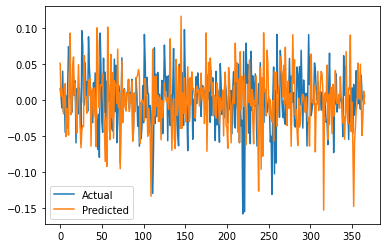

In [67]:
pyplot.plot(bnb_y_true, label='Actual')
pyplot.plot(bnb_y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [146]:
xrp_model = Prophet()
for col in l:
    xrp_model.add_regressor(col, standardize=False)
st = time.time()
xrp_model.fit(xrp_train)
et = time.time()
elapsed_time4 = et-st

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -8.39422
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1574.04    0.00426755       2474.86           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1624.62    0.00334518       3047.81           1           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1729.76     0.0183381       5996.35           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1944.29    0.00466908       4035.23           1           1      493   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        2241.7    0.00122404         18741      0.2078           1      623   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [69]:
xrp_forecast = xrp_model.predict(xrp_test)

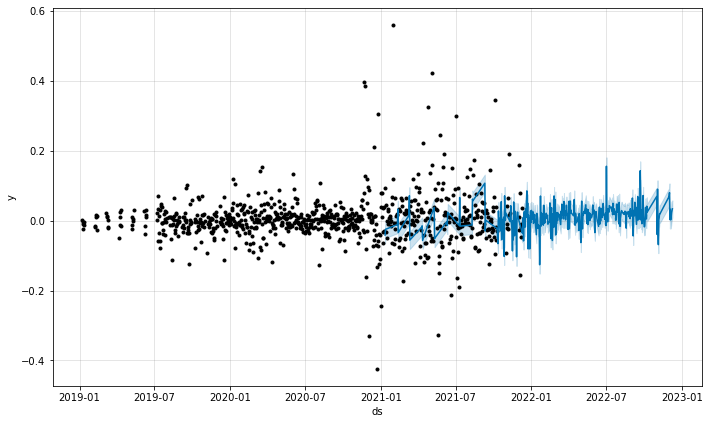

In [70]:
xrp_model.plot(xrp_forecast)
pyplot.show()

In [71]:
xrp_y_pred = xrp_forecast['yhat'].values
xrp_mae = mean_absolute_error(xrp_y_true, xrp_y_pred)
print('MAE: %.3f' % btc_mae)

xrp_mean = xrp_y_true.mean()
xrp_pred_targets = []
for i in xrp_y_pred:
    if i>xrp_mean:
        xrp_pred_targets.append(0)
    else:
        xrp_pred_targets.append(1)

xrp_accuracy = accuracy_score(xrp_test['target'].values, xrp_pred_targets)
print('accuracy score: ', xrp_accuracy)

MAE: 0.035
accuracy score:  0.4644808743169399


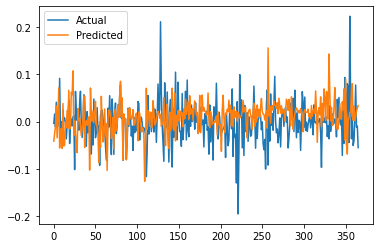

In [72]:
pyplot.plot(xrp_y_true, label='Actual')
pyplot.plot(xrp_y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [147]:
ada_model = Prophet()
for col in l:
    ada_model.add_regressor(col, standardize=False)
st = time.time()
ada_model.fit(ada_train)
et = time.time()
elapsed_time5 = et-st

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -12.6474
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1690.49    0.00265358       224.236           1           1      108   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1703.37   0.000694826       107.183           1           1      221   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1703.93   1.21122e-05       78.0662      0.3959      0.3959      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1704.16   5.07764e-05       80.6625           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     422       1704.16   6.17906e-08       65.2695      0.4503      0.4503      499   
Optimization terminated normally: 
  Convergence detected: relat

In [74]:
ada_forecast = ada_model.predict(ada_test)

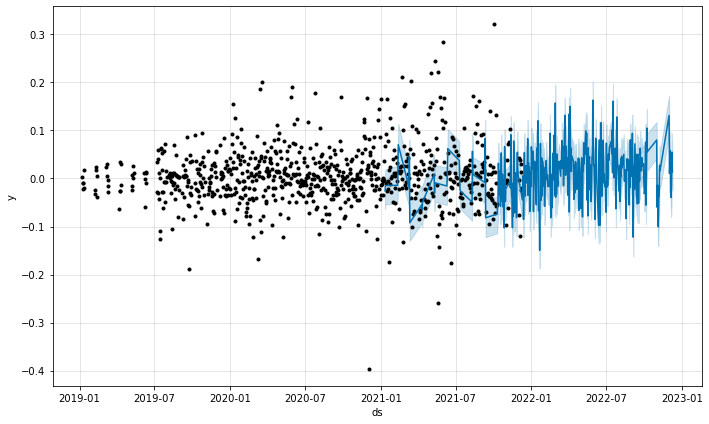

In [75]:
ada_model.plot(ada_forecast)
pyplot.show()

In [76]:
ada_y_pred = ada_forecast['yhat'].values
ada_mae = mean_absolute_error(ada_y_true, ada_y_pred)
print('MAE: %.3f' % ada_mae)

ada_mean = ada_y_true.mean()
ada_pred_targets = []
for i in ada_y_pred:
    if i>ada_mean:
        ada_pred_targets.append(0)
    else:
        ada_pred_targets.append(1)

ada_accuracy = accuracy_score(ada_test['target'].values, ada_pred_targets)
print('accuracy score: ', ada_accuracy)

MAE: 0.054
accuracy score:  0.5136612021857924


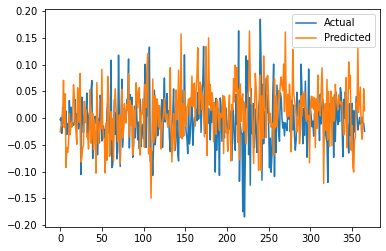

In [77]:
pyplot.plot(ada_y_true, label='Actual')
pyplot.plot(ada_y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [148]:
doge_model = Prophet()
for col in l:
    doge_model.add_regressor(col, standardize=False)
st = time.time()
doge_model.fit(doge_train)
et = time.time()
elapsed_time6 = et-st

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.74593
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2664.68    0.00199514       32746.6      0.3014      0.3014      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2817.78    0.00846445       87315.9           1           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2846.9    0.00308392       15781.1      0.4916     0.04916      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2855.84    0.00135143       30401.4      0.9893      0.9893      511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2868.27   0.000321805       4577.23      0.1497           1      631   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [79]:
doge_forecast = doge_model.predict(doge_test)

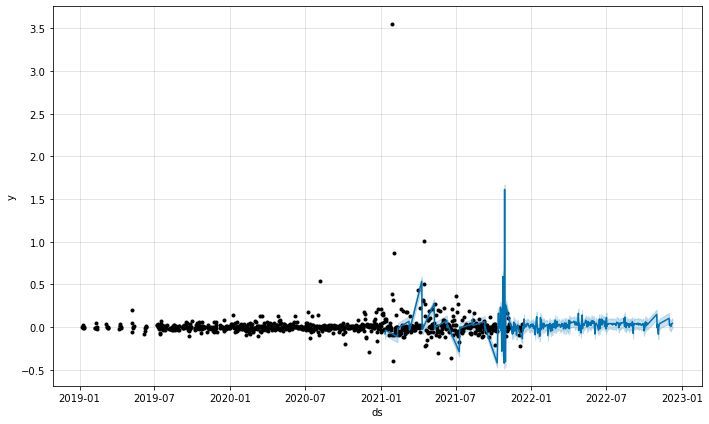

In [80]:
doge_model.plot(doge_forecast)
pyplot.show()

In [81]:
doge_y_pred = doge_forecast['yhat'].values
doge_mae = mean_absolute_error(doge_y_true, doge_y_pred)
print('MAE: %.3f' % doge_mae)

doge_mean = doge_y_true.mean()
doge_pred_targets = []
for i in doge_y_pred:
    if i>doge_mean:
        doge_pred_targets.append(0)
    else:
        doge_pred_targets.append(1)

doge_accuracy = accuracy_score(doge_test['target'].values, doge_pred_targets)
print('accuracy score: ', doge_accuracy)

MAE: 0.066
accuracy score:  0.505464480874317


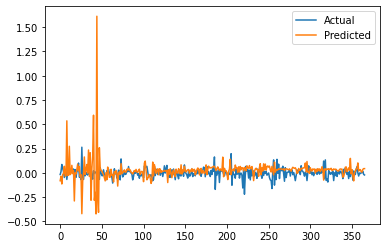

In [82]:
pyplot.plot(doge_y_true, label='Actual')
pyplot.plot(doge_y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [149]:
matic_model = Prophet()
for col in l:
    matic_model.add_regressor(col, standardize=False)
st = time.time()
matic_model.fit(matic_train)
et = time.time()
elapsed_time7 = et-st

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -11.7903
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2630.58     0.0215709       5878.01           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3237.69     0.0151427       7274.94           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3636.21     0.0112369       6099.89           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        3728.6    0.00195488        7897.6           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4025.96      0.029924       18095.4           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

    9499       6105.61   1.35015e-05       61874.6      0.7262      0.7262    10685   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9599       6107.37   9.38622e-06       13213.6           1           1    10801   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9699       6108.74   1.85069e-06       4121.25           1           1    10913   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9799       6111.82   0.000272427       60234.1      0.4857           1    11030   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9899       6114.46   1.72616e-05       37868.9      0.8223      0.8223    11138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9999        6116.7   4.55725e-06       34949.8     0.08208           1    11255   
    Iter      log 

In [84]:
matic_forecast = matic_model.predict(matic_test)

e-05       16362.9           1           1     5070   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       5737.44   0.000158581       17151.9           1           1     5182   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       5738.66   1.47412e-05       6240.02           1           1     5291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       5742.67   6.82083e-05       43718.7      0.1336           1     5400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899       5749.19   1.17819e-05       14043.6           1           1     5517   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4999        5754.6   3.83025e-05       8270.64       1.599      0.1599     5631   
    Iter      log prob        ||dx||      ||grad||

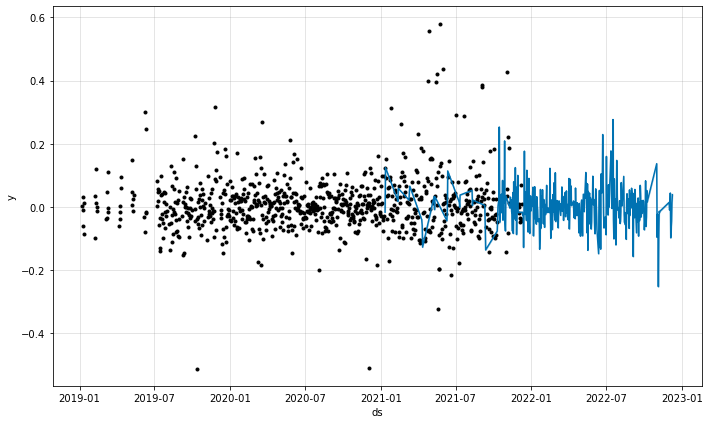

In [85]:
matic_model.plot(matic_forecast)
pyplot.show()

In [86]:
matic_y_pred = matic_forecast['yhat'].values
matic_mae = mean_absolute_error(matic_y_true, matic_y_pred)
print('MAE: %.3f' % matic_mae)

matic_mean = matic_y_true.mean()
matic_pred_targets = []
for i in matic_y_pred:
    if i>matic_mean:
        matic_pred_targets.append(0)
    else:
        matic_pred_targets.append(1)

matic_accuracy = accuracy_score(matic_test['target'].values, matic_pred_targets)
print('accuracy score: ', matic_accuracy)

MAE: 0.063
accuracy score:  0.5163934426229508


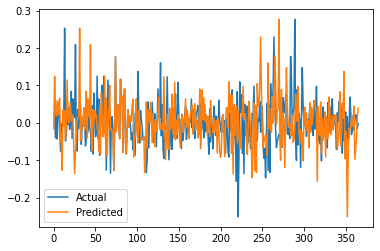

In [87]:
pyplot.plot(matic_y_true, label='Actual')
pyplot.plot(matic_y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [150]:
trx_model = Prophet()
for col in l:
    trx_model.add_regressor(col, standardize=False)
st = time.time()
trx_model.fit(trx_train)
et = time.time()
elapsed_time8 = et-st

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -38.4526
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1835.09     0.0431365       12364.9           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2126.93      0.036733       8547.87           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2685.02   0.000501247       23293.9      0.1275           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3112.16     0.0141535       21150.3           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3580.85    0.00514102       27583.2      0.9776      0.9776      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

    9499       6056.45   2.86069e-05       17452.7           1           1    11035   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9599          6060    4.1711e-05        131220      0.3618      0.3618    11156   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9699       6061.27   1.21587e-05       47183.9           1           1    11273   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9799       6062.13    1.1001e-06       31665.7           1           1    11385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9899        6062.8   1.24846e-05       36126.9     0.05226           1    11499   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9999          6063   6.57414e-06       17134.5      0.1269           1    11617   
    Iter      log 

In [89]:
trx_forecast = trx_model.predict(trx_test)

15   0.000108754       68875.9           1           1     8478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    7399       5458.98   4.00759e-06       11507.7      0.4734      0.4734     8595   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    7499       5459.63   1.07042e-05       7319.16           1           1     8707   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    7599       5461.36   8.64584e-05       55150.7           1           1     8818   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    7699       5462.67   5.30566e-06       6603.63           1           1     8936   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    7799       5465.09   4.95042e-05       9150.93           1           1     9045   
    Iter      log prob        ||dx||  

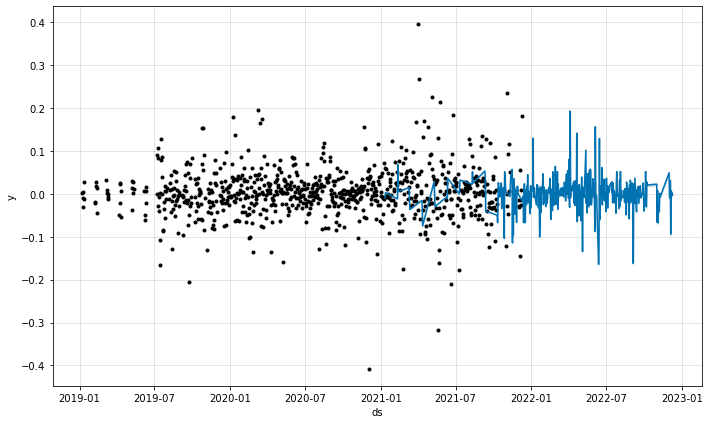

In [90]:
trx_model.plot(trx_forecast)
pyplot.show()

In [91]:
trx_y_pred = trx_forecast['yhat'].values
trx_mae = mean_absolute_error(trx_y_true, trx_y_pred)
print('MAE: %.3f' % trx_mae)

trx_mean = trx_y_true.mean()
trx_pred_targets = []
for i in trx_y_pred:
    if i>trx_mean:
        trx_pred_targets.append(0)
    else:
        trx_pred_targets.append(1)

trx_accuracy = accuracy_score(trx_test['target'].values, trx_pred_targets)
print('accuracy score: ', trx_accuracy)

MAE: 0.036
accuracy score:  0.5


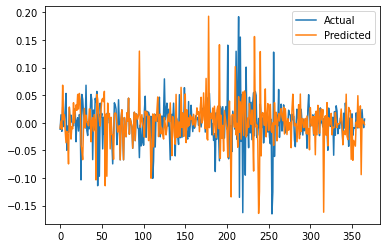

In [92]:
pyplot.plot(trx_y_true, label='Actual')
pyplot.plot(trx_y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [151]:
leo_model = Prophet()
for col in l:
    leo_model.add_regressor(col, standardize=False)
st = time.time()
leo_model.fit(leo_train)
et = time.time()
elapsed_time9 = et-st

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.7812
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2004.33   0.000479775        1696.8      0.5145      0.5145      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2017.72   0.000159117        2365.5     0.01429           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2034.94    0.00407027       9738.49           1           1      384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2046.96    0.00226941       7491.01           1           1      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2074.13    0.00357556       7823.99           1           1      641   
    Iter      log prob        ||dx||      ||grad||       alpha   

In [94]:
leo_forecast = leo_model.predict(leo_test)

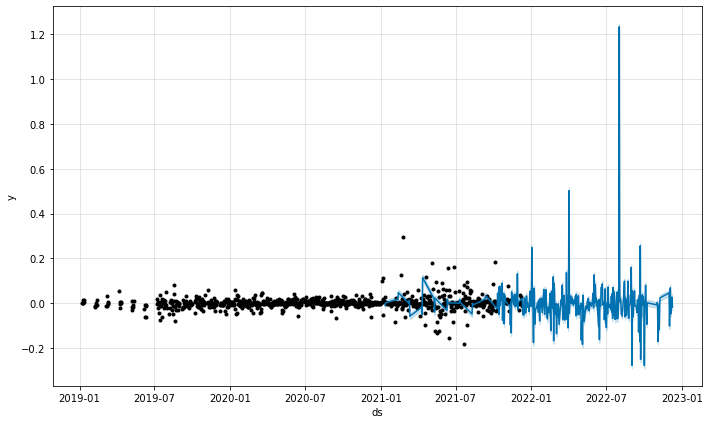

In [95]:
leo_model.plot(leo_forecast)
pyplot.show()

In [96]:
leo_y_pred = leo_forecast['yhat'].values
leo_mae = mean_absolute_error(leo_y_true, leo_y_pred)
print('MAE: %.3f' % leo_mae)

leo_mean = leo_y_true.mean()
leo_pred_targets = []
for i in leo_y_pred:
    if i>leo_mean:
        leo_pred_targets.append(0)
    else:
        leo_pred_targets.append(1)

leo_accuracy = accuracy_score(leo_test['target'].values, leo_pred_targets)
print('accuracy score: ', leo_accuracy)

MAE: 0.053
accuracy score:  0.4344262295081967


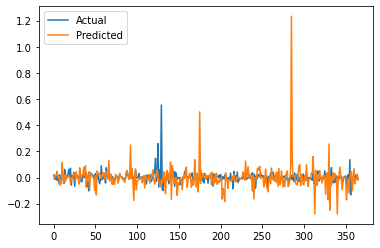

In [97]:
pyplot.plot(leo_y_true, label='Actual')
pyplot.plot(leo_y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [98]:
from tabulate import tabulate
 
mydata = [
    ["BTC", btc_mae, btc_accuracy],
    ["ETH", eth_mae, eth_accuracy],
    ["BNB", bnb_mae, bnb_accuracy],
    ["XRP", xrp_mae, xrp_accuracy],
    ["ADA", ada_mae, ada_accuracy],
    ["DOGE", doge_mae, doge_accuracy],
    ["MATIC", matic_mae, matic_accuracy],
    ["TRX", trx_mae, trx_accuracy],
    ["LEO", leo_mae, leo_accuracy]
]

head = ["Coin", "MAE", "Accuracy score"]

print(tabulate(mydata, headers=head, tablefmt="grid"))

+--------+-----------+------------------+
| Coin   |       MAE |   Accuracy score |
+========+===========+==================+
| BTC    | 0.0352575 |         0.513661 |
+--------+-----------+------------------+
| ETH    | 0.0565956 |         0.480874 |
+--------+-----------+------------------+
| BNB    | 0.0404758 |         0.532787 |
+--------+-----------+------------------+
| XRP    | 0.0412045 |         0.464481 |
+--------+-----------+------------------+
| ADA    | 0.05426   |         0.513661 |
+--------+-----------+------------------+
| DOGE   | 0.0658955 |         0.505464 |
+--------+-----------+------------------+
| MATIC  | 0.0632183 |         0.516393 |
+--------+-----------+------------------+
| TRX    | 0.0363313 |         0.5      |
+--------+-----------+------------------+
| LEO    | 0.0528088 |         0.434426 |
+--------+-----------+------------------+


In [99]:
btc = classification_report(btc_test['target'].values, btc_pred_targets, output_dict=True)
eth = classification_report(eth_test['target'].values, eth_pred_targets, output_dict=True)
bnb = classification_report(bnb_test['target'].values, bnb_pred_targets, output_dict=True)
xrp = classification_report(xrp_test['target'].values, xrp_pred_targets, output_dict=True)
ada = classification_report(ada_test['target'].values, ada_pred_targets, output_dict=True)
doge = classification_report(doge_test['target'].values, doge_pred_targets, output_dict=True)
matic = classification_report(matic_test['target'].values, matic_pred_targets, output_dict=True)
trx = classification_report(trx_test['target'].values, trx_pred_targets, output_dict=True)
leo = classification_report(leo_test['target'].values, leo_pred_targets, output_dict=True)

In [105]:
w2 = [btc['weighted avg']['f1-score'],eth['weighted avg']['f1-score'],bnb['weighted avg']['f1-score'],
     xrp['weighted avg']['f1-score'],ada['weighted avg']['f1-score'],doge['weighted avg']['f1-score'],
     matic['weighted avg']['f1-score'],trx['weighted avg']['f1-score'],leo['weighted avg']['f1-score']]

In [155]:
l = list()
for i,j in zip(coin_name, w2):
    l.append([i,j])

In [156]:
avg_time = (elapsed_time1+elapsed_time2+elapsed_time3+elapsed_time4+elapsed_time5+elapsed_time6+elapsed_time7+elapsed_time8+elapsed_time9)/9


In [157]:
avg_time

2.4068108134799533

In [158]:
l.append(['Average Time', '2.41s'])

In [159]:
head = ["Coin", "FBProphet Results"]

print(tabulate(l, headers=head, tablefmt="grid"))

+--------------+---------------------+
| Coin         | FBProphet Results   |
+==============+=====================+
| BTC          | 0.5087985509729855  |
+--------------+---------------------+
| ETH          | 0.47966390820887433 |
+--------------+---------------------+
| BNB          | 0.5327973493798073  |
+--------------+---------------------+
| XRP          | 0.4409703604734113  |
+--------------+---------------------+
| ADA          | 0.5078808062711383  |
+--------------+---------------------+
| DOGE         | 0.4704914052447661  |
+--------------+---------------------+
| MATIC        | 0.5163753915402223  |
+--------------+---------------------+
| TRX          | 0.4995333417954021  |
+--------------+---------------------+
| LEO          | 0.43183873428805253 |
+--------------+---------------------+
| Average Time | 2.41s               |
+--------------+---------------------+
